In [1]:
from datetime import datetime
import pandas as pd
import mplfinance as mpf
import numpy as np

In [3]:
#upload data from data_folder file
data_folder = 'data_raw'
df_upcom = pd.read_csv(data_folder + '/CafeF.UPCOM.Upto20.05.2022.csv')
df_hnx = pd.read_csv(data_folder + '/CafeF.HNX.Upto20.05.2022.csv')
df_hsx = pd.read_csv(data_folder + '/CafeF.HSX.Upto20.05.2022.csv')
df_all_index = pd.read_csv(data_folder + '/CafeF.INDEX.Upto20.05.2022.csv')
stocks_upcom = df_upcom['<Ticker>'].values
stocks_hnx = df_hnx['<Ticker>'].values
stocks_hsx = df_hsx['<Ticker>'].values
del df_all_index['Unnamed: 7']
del df_all_index['Unnamed: 8']
del df_all_index['Unnamed: 9']

In [4]:
# create dataframes of all stocks and vnindex
df_all_stocks = (df_hsx.append(df_hnx)).append(df_upcom)
df_vnindex = df_all_index[df_all_index['<Ticker>'] == 'VNINDEX']

In [5]:
df_all_stocks[df_all_stocks.isna().any(axis=1)]

,<Ticker>,<DTYYYYMMDD>,<Open>,<High>,<Low>,<Close>,<Volume>


In [6]:
df_all_stocks[df_all_stocks.isnull().any(axis=1)]

,<Ticker>,<DTYYYYMMDD>,<Open>,<High>,<Low>,<Close>,<Volume>


In [7]:
df_all_stocks[(df_all_stocks == 0).any(axis=1)]

,<Ticker>,<DTYYYYMMDD>,<Open>,<High>,<Low>,<Close>,<Volume>
399754,VNAll-INDEX,20150904,0.0,0.000,0.0000,546.2800,54624810
404890,VNAll-INDEX,20151005,0.0,0.000,0.0000,557.6000,76694790
654795,S4A,20190404,0.0,23.397,23.3970,23.3996,10
654802,SCD,20190404,0.0,23.184,22.1697,23.1840,500
654804,SCS,20190404,0.0,136.085,136.0000,136.0142,10520
...,...,...,...,...,...,...,...
407188,NS3,20210820,0.0,0.000,0.0000,20.6000,50
407204,PHH,20210820,0.0,0.000,0.0000,12.2000,1
407263,SD1,20210820,0.0,0.000,0.0000,1.0000,1
407330,TUG,20210820,0.0,0.000,0.0000,16.7270,1


In [8]:
df_vnindex[df_vnindex.isna().any(axis=1)]

,<Ticker>,<DTYYYYMMDD>,<Open>,<High>,<Low>,<Close>,<Volume>


In [9]:
df_vnindex[df_vnindex.isnull().any(axis=1)]

,<Ticker>,<DTYYYYMMDD>,<Open>,<High>,<Low>,<Close>,<Volume>


In [10]:
df_vnindex[(df_vnindex == 0).any(axis=1)]

,<Ticker>,<DTYYYYMMDD>,<Open>,<High>,<Low>,<Close>,<Volume>


In [10]:
# sort in order of increasing the trading date
# remove the ETF-fund 
df_all_stocks = df_all_stocks[df_all_stocks['<Ticker>'].str.len() < 4]
df_vnindex = df_vnindex.sort_values('<DTYYYYMMDD>')
df_all_stocks = df_all_stocks.sort_values('<DTYYYYMMDD>')

In [12]:
vnindex_trading_date = df_vnindex['<DTYYYYMMDD>'].values
all_stocks_trading_date = df_all_stocks['<DTYYYYMMDD>'].values
print(len(vnindex_trading_date))
vnindex_trading_date = list(dict.fromkeys(vnindex_trading_date))
print(len(vnindex_trading_date))
print(len(all_stocks_trading_date))
all_stocks_trading_date = list(dict.fromkeys(all_stocks_trading_date))
print(len(all_stocks_trading_date))

5283
5283
2108547
5286


In [13]:
deficient_list = list(set(all_stocks_trading_date) - set(vnindex_trading_date))
deficient_list

[20180124, 20180123, 20060116]

In [14]:
df_all_stocks = df_all_stocks[~(df_all_stocks['<DTYYYYMMDD>'].isin(deficient_list))]

In [15]:
vnindex_trading_date = df_vnindex['<DTYYYYMMDD>'].values
all_stocks_trading_date = df_all_stocks['<DTYYYYMMDD>'].values
print(len(vnindex_trading_date))
vnindex_trading_date = list(dict.fromkeys(vnindex_trading_date))
print(len(vnindex_trading_date))
print(len(all_stocks_trading_date))
all_stocks_trading_date = list(dict.fromkeys(all_stocks_trading_date))
print(len(all_stocks_trading_date))

5283
5283
2107694
5283


In [16]:
tickers = df_all_stocks['<Ticker>'].values
tickers = list(dict.fromkeys(tickers))

In [17]:
df_stocks = {}
for i, stock in enumerate(tickers):
    df_tmp = df_all_stocks[df_all_stocks['<Ticker>'] == stock].sort_values('<DTYYYYMMDD>')
    del df_tmp['<Ticker>']
    stock_ite = 0
    vnindex_ite = 0
    ipo_date = int(df_tmp.iloc[stock_ite][0])
    for j in range(len(vnindex_trading_date)):
        if ipo_date == int(vnindex_trading_date[j]):
            vnindex_ite = j
    log_stock_ite = []
    log_vnindex_ite = []
    while True:
        if vnindex_trading_date[vnindex_ite] == df_tmp.iloc[stock_ite][0]:
            log_vnindex_ite.append(int(vnindex_ite))
            log_stock_ite.append(stock_ite)
            vnindex_ite += 1
            stock_ite += 1
            if stock_ite == len(df_tmp):
                break
            if vnindex_ite == len(vnindex_trading_date):
                break
        else:
            vnindex_ite += 1
            if vnindex_ite == len(vnindex_trading_date):
                break      
    flag = True
    free_days = 0
    free_indexes = []
    for j in range(1, len(log_vnindex_ite)):
        free_days += (log_vnindex_ite[j] - log_vnindex_ite[j - 1] - 1)
        if log_vnindex_ite[j] - log_vnindex_ite[j - 1] >= 5:
            flag = False
            break
        if log_vnindex_ite[j] - log_vnindex_ite[j - 1] == 2:
            start_day = df_tmp.iloc[j-1]
            end_day = df_tmp.iloc[j]
            for q in range(log_vnindex_ite[j - 1] + 1, log_vnindex_ite[j]):
                trading_day = vnindex_trading_date[q]
                df_tmp = df_tmp.append({'<DTYYYYMMDD>': int(trading_day), 
                                        '<Open>': start_day['<Close>'], 
                                        '<High>': max(start_day['<Close>'], end_day['<Open>']), 
                                        '<Low>': min(start_day['<Close>'], end_day['<Open>']), 
                                        '<Close>': end_day['<Open>'],
                                        '<Volume>': start_day['<Volume>'] / df_vnindex.iloc[log_vnindex_ite[j-1]][6] * df_vnindex.iloc[q][6]}, ignore_index=True)
        elif log_vnindex_ite[j] - log_vnindex_ite[j - 1] > 2:
            start_day = df_tmp.iloc[j-1]
            end_day = df_tmp.iloc[j]
            for q in range(log_vnindex_ite[j - 1] + 1, log_vnindex_ite[j]):
                trading_day = vnindex_trading_date[q]
                df_tmp = df_tmp.append({'<DTYYYYMMDD>': int(trading_day), 
                                        '<Open>': start_day['<Close>'], 
                                        '<High>': start_day['<Close>'], 
                                        '<Low>': start_day['<Close>'], 
                                        '<Close>': start_day['<Close>'],
                                        '<Volume>': 0.0}, ignore_index=True)
                
    if flag and free_days < (free_days + len(log_vnindex_ite)) * 0.1:
        print(stock, free_days)
        df_stocks[stock] = df_tmp.sort_values('<DTYYYYMMDD>')

BSR 12


In [19]:
for key in df_stocks:
    df_tmp = df_stocks[key]
    if key in stocks_upcom:
        amplitude = 0.15
    if key in stocks_hnx:
        amplitude = 0.1
    if key in stocks_hsx:
        amplitude = 0.07
    num = 5
    for i in range(num, len(df_tmp)):
        df_tmp.iloc[i][2] = max(df_tmp.iloc[i][1], df_tmp.iloc[i][2], df_tmp.iloc[i][4])
        df_tmp.iloc[i][3] = min(df_tmp.iloc[i][1], df_tmp.iloc[i][3], df_tmp.iloc[i][4])
        if (df_tmp.iloc[i][2] / df_tmp.iloc[i][1] - 1 > amplitude or df_tmp.iloc[i][2] / df_tmp.iloc[i][4] - 1 > amplitude * 0.8):
            x = df_tmp.iloc[i][2]
            temp_amp = 0
            for j in range(num):
                temp_amp += (df_tmp.iloc[i-j-1][2] / df_tmp.iloc[i-j-1][1] - 1)
            temp_amp = temp_amp / float(num)
            df_tmp.iloc[i][2] = df_tmp.iloc[i][1] * (1 + temp_amp)
            print(temp_amp)
        if (df_tmp.iloc[i][1] / df_tmp.iloc[i][3] - 1 > amplitude or df_tmp.iloc[i][1] / df_tmp.iloc[i][3] - 1 > amplitude * 0.8):
            x = df_tmp.iloc[i][3]
            temp_amp = 0
            for j in range(num):
                temp_amp += (df_tmp.iloc[i-j-1][1] / df_tmp.iloc[i-j-1][3] - 1)
            temp_amp = temp_amp / float(num)
            df_tmp.iloc[i][3] = df_tmp.iloc[i][1] * (1 - temp_amp) 
            print(temp_amp)
    df_stocks[key] = df_tmp

0.018030739622763914
0.020331777171579236
0.016445414331109243
0.025046831548826542
0.02630576789472374
0.013310820318321249
0.029682053769966375
0.020704331760112327
0.025832032291372053
0.023559678881557744
0.012440920605061833
0.010865198270721521
0.007368798561558166
0.0285161103454576
0.005840823390453531
0.02958041958041959
0.017521955642160282
0.010251336332692419
0.018355390865229148
0.012272460364063464
0.01078261370412532
0.012319618366130002
0.014767118557568227
0.015584780373980723
0.01262767909571343
0.017656720120350845
0.013170500572542699
0.0033066885290701452
0.013462227261648741
0.0023420099747216037
0.020487261637686816
0.021394062053023168
0.016431727330107337
0.0156926714188252
0.012858448679066914
0.03376345555573903
0.01500993454885462
0.034357162730972446
0.024442056698621116
0.012565789473684186
0.0021052631578947433
0.012789317150116197
0.02493777300953104
0.014584237655995702
0.02241068798653485
0.014223871366728558
0.015089491178396041
0.01400080008000799
0.

In [44]:
for key in df_stocks:
    f = open('data_splitted/'+ key +'.csv', 'wb')
    f.close()
    df_stocks[key].to_csv('data_splitted/'+ key +'.csv', index=False)

In [20]:
    def drawChart(name, draw_df, number_of_candles=150):
        try:
            del draw_df['<Ticker>']
        except:
            pass
        date_chart = []
        for row in draw_df.iloc:
            tmp = str(row[0])
            year = int(tmp[0:4])
            month = int(tmp[4:6])
            day = int(tmp[6:8])
            
            date_chart.append(datetime(year, month, day))
        chart_df = pd.DataFrame({'Date': date_chart, 'High': draw_df['<High>'].values, 'Low': draw_df['<Low>'].values,
                                 'Open': draw_df['<Open>'].values, 'Close': draw_df['<Close>'].values,
                                 'Volume': draw_df['<Volume>'].values}
                                , index=date_chart)
        mpf.plot(chart_df[-number_of_candles:-1], type='candle', volume=True, figratio=(15, 7), style='yahoo',
                 title=name, mav=(6, 15))

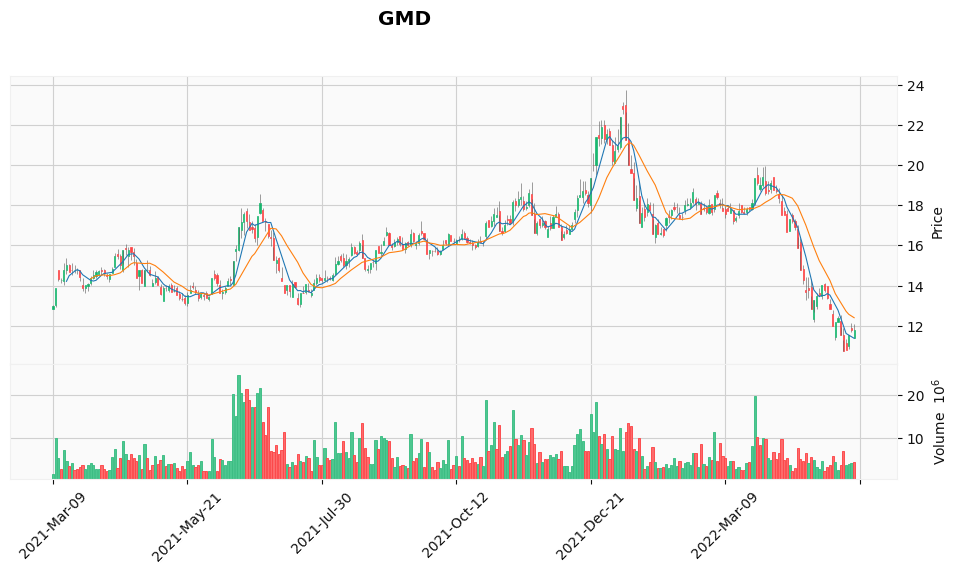

In [43]:
drawChart('GMD', df_stocks['AAA'], 300)

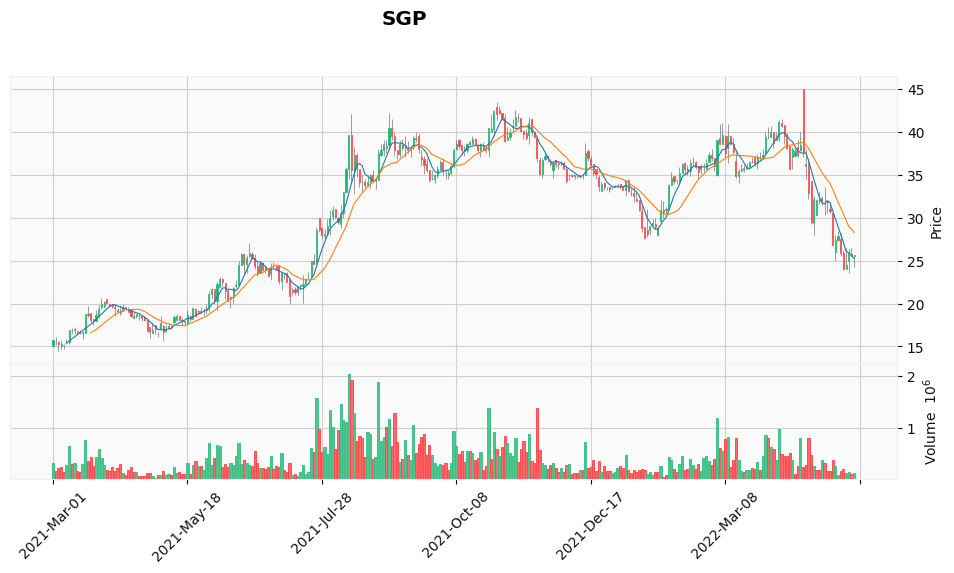

In [36]:
drawChart('SGP', df_all_stocks[df_all_stocks['<Ticker>'] == 'SGP'], 300)